<a href="https://colab.research.google.com/github/pathvasariah/KmeansGoogleColab/blob/main/kmeans_iris_pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clusterização


---



Os algoritmos de clusterização ou agrupamento permitem que seja feito agrupamentos com base nas semelhanças encontradas. É uma técnica que permite realizar divisões de grupos em um conjunto de dados de forma automática baseado em medidas de similaridade ou de distância. Existem vários métodos que permitem obter medidas de similaridade, podemos citar a similaridade de cosseno e a correlação de Pearson.

É um dos algoritmos mais utilizados para realizar agrupamentos de dados numéricos em mineração de dados

### São utilizados para:


*   Segmentação de mercado.
*   Agrupamento de características de clientes, produtos mais similares.
*   Agrupar perfis de clientes(Amazon Prime, Netflix, similares).
*   Recomendação de itens.

## Definição


*   A clusterização, que é uma técnica de aprendizado não supervisionado que permite dividir atomaticamente o conjunto de dados em grupos de acordo com a similaridade.

Exemplo prático:

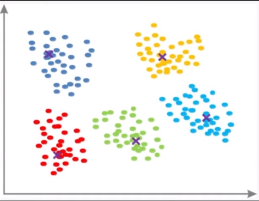




## Implementando algoritmo de K-means

Nesta atividade, vamos implementar o algoritmo K-means em um conjunto de dados. Para isso, vamos executar os seguintes passos:


*   Carregar o dataset de iris;
*   Analisar dados coletados;
*   Realizar tratamento de dados;  
*   Aplicar modelo ML de K-means;
*   Visualizar resultados;


---




## Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Verificando versões das bibliotecas

In [ ]:
import sklearn
import plotly

print(f''' Verificando as versões das bibliotecas: \n
      pandas: {pd.__version__}
      numpy: {np.__version__}
      sklearn: {sklearn.__version__}
      plotly: {plotly.__version__}
''')

 Verificando as versões das bibliotecas: 

      pandas: 2.0.3
      numpy: 1.25.2
      sklearn: 1.2.2
      plotly: 5.15.0



### Coletando dados

In [4]:
iris = pd.read_csv('/content/iris.csv', sep=';')

### Analisando dados coletados

In [ ]:
# Visualizando arquivos da base de dados.
iris.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.tail()

,sepal length,sepal width,petal length,petal width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


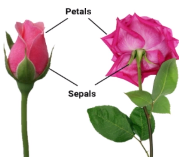

In [ ]:
# Gerando alguma estatística da base de dados
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Número de classes existentes no dataframe (nomes distintos)
iris['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# Contando número de classes (quantidade)
len(iris['Class'].unique())

3

In [ ]:
# Avaliando número de linhas e colunas
iris.shape

(150, 5)

In [ ]:
# Verificando se há valores nulos ou ausentes
iris.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
Class           0
dtype: int64

In [ ]:
# Verificando informações da base de dados
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Criando clusters com os dados das pétalas


---

Para nosso primeiro experimento vamos realizar o agrupamento dos dados baseadono comprimento e largura das pétalas.

### Coletando dados das pétalas

In [8]:
# Criando variável x com as colunas petal lenght e petal width
X_petala = iris.iloc[:,[2,3]].values

# Mostrado os dez primeiros
X_petala[:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

## Normalizando os dados
Quando os dados estão em uma escala muito diferente, precisamos normalizar os dados colocando no mesmo padrão e na mesma escala.

Como o K-means realiza os cálculos baseado na distância, devemos padronizar os dados afim de que um atributo não seja considerado mais importante do que o outro (não ser enviesado/tendecioso).

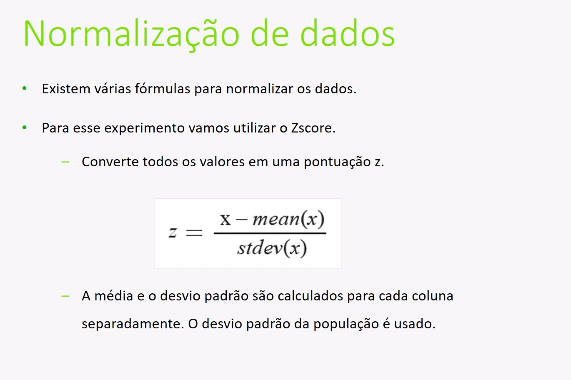

In [ ]:
# Nesse caso, nem precisaria já que os os valores já estão em mesma escala.
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
normalizar_dados = StandardScaler()
X_petala = normalizar_dados.fit_transform(X_petala)
X_petala[:10]

array([[-1.3412724 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.39813811, -1.31297673],
       [-1.2844067 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.17067529, -1.05003079],
       [-1.3412724 , -1.18150376],
       [-1.2844067 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.2844067 , -1.4444497 ]])

## Calculando o número de clusters
Para calcular o núumero do cluster vamos utilizar o método do cotovelo.

WCSS é a soma da distância quadrada entre cada ponto e o centroíde em um cluster.

In [32]:
wcss_petala = []
for i in range(1,11):
  kmeans_petala = KMeans(n_clusters=i, random_state=0)
  kmeans_petala.fit(X_petala)
  wcss_petala.append(kmeans_petala.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [33]:
# Visualizando os valores de WCSS
for i in range(len(wcss_petala)):
  print('Cluster:', i+1, '- Valor do WCSS:', wcss_petala[i])

Cluster: 1 - Valor do WCSS: 300.0000000000001
Cluster: 2 - Valor do WCSS: 54.14584701344988
Cluster: 3 - Valor do WCSS: 18.046983891906276
Cluster: 4 - Valor do WCSS: 12.307440251261843
Cluster: 5 - Valor do WCSS: 9.181131495513899
Cluster: 6 - Valor do WCSS: 7.215096212730807
Cluster: 7 - Valor do WCSS: 6.026593155951448
Cluster: 8 - Valor do WCSS: 5.173315218915379
Cluster: 9 - Valor do WCSS: 4.419290104197288
Cluster: 10 - Valor do WCSS: 3.9139417830543204


## Definindo melhor o número de clusters para as pétalas

In [34]:
#Criando gráfico em linha(cotovelo)
grafico_cotovelo_petala = px.line(x = range(1, 11), y = wcss_petala)

# Inserindo título do eixo X
grafico_cotovelo_petala.update_xaxes(title_text = "Número de Clusters")

# Inserindo título do eixo Y
grafico_cotovelo_petala.update_yaxes(title_text = "Valor de WCSS")

# Inserindo título do gráfico e centralizando
grafico_cotovelo_petala.update_layout(title_text = "Definindo o número de Clusters", title_x = 0.5)
grafico_cotovelo_petala.show()

## Executando o algoritmo K-means para as pétalas

In [35]:
kmeans_petala = KMeans(n_clusters = 3, random_state = 0)
label_cluster_petala = kmeans_petala.fit_predict(X_petala)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [36]:
# Verificando classificação dos clusters (cores)
label_cluster_petala

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

## Visualizando os centroídes de cada cluster

In [37]:
centroides_petala = kmeans_petala.cluster_centers_
centroides_petala

array([[-1.30487835, -1.25512862],
       [ 1.02813193,  1.12749028],
       [ 0.30564587,  0.16609419]])

### Visualizando os dados agrupados com os dados das pétalas

In [ ]:
# Gráfico da dispersão das pétalas
grafico_petala = px.scatter(x = X_petala[:, 0], y = X_petala[:, 1], color = label_cluster_petala)

# Gráfico centroídes
grafico_centroide_petala = px.scatter(x = centroides_petala[:, 0], y = centroides_petala[:, 1], size=[7, 7, 7])

# Unindo gráficos
grafico_final = go.Figure(data = grafico_petala.data + grafico_centroide_petala.data)

# Inserindo título do eixo X
grafico_final.update_xaxes(title_text = "Comprimento")

# Inserindo título do eixo Y
grafico_final.update_yaxes(title_text = "Largura")

# Inserindo título do gráfico e centralizando
grafico_final.update_layout(title_text = "Clusters", title_x = 0.5)
grafico_final.show()

In [ ]:
centroides_petala

array([[-1.30487835, -1.25512862],
       [ 1.02813193,  1.12749028],
       [ 0.30564587,  0.16609419]])

#Realizar o mesmo processo para as Sépulas

In [10]:
# Coletando dados sépalas

# Agrupamento sépalas:
X_sepala = iris.iloc[:, [0, 1]].values
X_sepala = normalizar_dados.fit_transform(X_sepala)
X_sepala[:5]


array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019]])

## Calculando valor do WCSS

In [11]:
wcss_sepala = []
for i in range(1,11):
  kmeans_sepala = KMeans(n_clusters=i, random_state=0)
  kmeans_sepala.fit(X_sepala)
  wcss_sepala.append(kmeans_sepala.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [12]:
# Visualizando os valores do WCSS
#Criando gráfico em linha(cotovelo)
grafico_cotovelo_sepala = px.line(x = range(1, 11), y = wcss_sepala)

# Inserindo título do eixo X
grafico_cotovelo_sepala.update_xaxes(title_text = "Número de Clusters")

# Inserindo título do eixo Y
grafico_cotovelo_sepala.update_yaxes(title_text = "Valor de WCSS")

# Inserindo título do gráfico e centralizando
grafico_cotovelo_sepala.update_layout(title_text = "Definindo o número de Clusters", title_x = 0.5)
grafico_cotovelo_sepala.show()

## Definindo o melhor número de clusters das sépalas

Executando algoritmo K-means para as sépalas

In [13]:
kmeans_sepala = KMeans(n_clusters = 3, random_state = 0)
label_cluster_sepala = kmeans_sepala.fit_predict(X_sepala)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



## Verifica a classificação dos clusters

In [25]:
label_cluster_sepala

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## Visualizando dados agrupados com dados das sépalas

In [26]:
centroides_sepala = kmeans_sepala.cluster_centers_

In [27]:
# Visualizando centroides
centroides_sepala

array([[-0.04825457, -0.89224112],
       [-0.97822861,  0.89321545],
       [ 1.20144049,  0.14411561]])

In [28]:
# Gráfico da dispersão das sépalas
grafico_sepala = px.scatter(x = X_sepala[:, 0], y = X_sepala[:, 1], color = label_cluster_sepala)

# Gráfico centroídes
grafico_centroide_sepala = px.scatter(x = centroides_sepala[:, 0], y = centroides_sepala[:, 1], size=[7, 7, 7])

# Unindo gráficos
grafico_final = go.Figure(data = grafico_sepala.data + grafico_centroide_sepala.data)

# Inserindo título do eixo X
grafico_final.update_xaxes(title_text = "Comprimento")

# Inserindo título do eixo Y
grafico_final.update_yaxes(title_text = "Largura")

# Inserindo título do gráfico e centralizando
grafico_final.update_layout(title_text = "Clusters", title_x = 0.5)
grafico_final.show()

#Criando função para visualização de dados

In [29]:
# Criando a função
def gera_grafico(X, y, color, X_centroide, y_centroide):
  # Gráfico da dispersão das sépalas
  grafico = px.scatter(x = X,
                       y = y,
                       color = color
                       )

  # Gráfico centroídes
  grafico_centroide = px.scatter(
      x = X_centroide,
      y = y_centroide, size=[7, 7, 7]
      )

  # Unindo gráficos
  grafico_final = go.Figure(data = grafico.data + grafico_centroide.data)

  # Inserindo título do eixo X
  grafico_final.update_xaxes(title_text = "Comprimento")

  # Inserindo título do eixo Y
  grafico_final.update_yaxes(title_text = "Largura")

  # Inserindo título do gráfico e centralizando
  grafico_final.update_layout(title_text = "Clusters", title_x = 0.5)
  grafico_final.show()

### Executando a função para as sépalas

In [30]:
X = X_sepala[:, 0]
y = X_sepala[:, 1]
color = label_cluster_sepala
X_centroide = centroides_sepala[:, 0]
y_centroide = centroides_sepala[:, 1]

gera_grafico(X, y, color, X_centroide, y_centroide)

### Executando função para as pétalas

In [38]:
X = X_petala[:, 0]
y = X_petala[:, 1]
color = label_cluster_petala
X_centroide = centroides_petala[:, 0]
y_centroide = centroides_petala[:, 1]

gera_grafico(X, y, color, X_centroide, y_centroide)